In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display
import calendar
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\saiku\OneDrive\Desktop\OIBSIP\Unemployment_Rate_upto_11_2020.csv")

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


# Checking missing values in dataset

In [6]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
data.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [8]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [9]:
import datetime as dt
# Renaming columns for better clarity
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']
# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
data['Frequency'] = data['Frequency'].astype('category')
data['Region'] = data['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
data['Month'] = data['Date'].dt.month

# Converting 'Month' to integer format
data['Month_int'] = data['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
data['Month_name'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
data.drop(columns='Month', inplace=True)

In [10]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


# Visualizing the correlation between different features in dataset

C:\Users\saiku\AppData\Local\Temp\ipykernel_2852\3710897921.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)


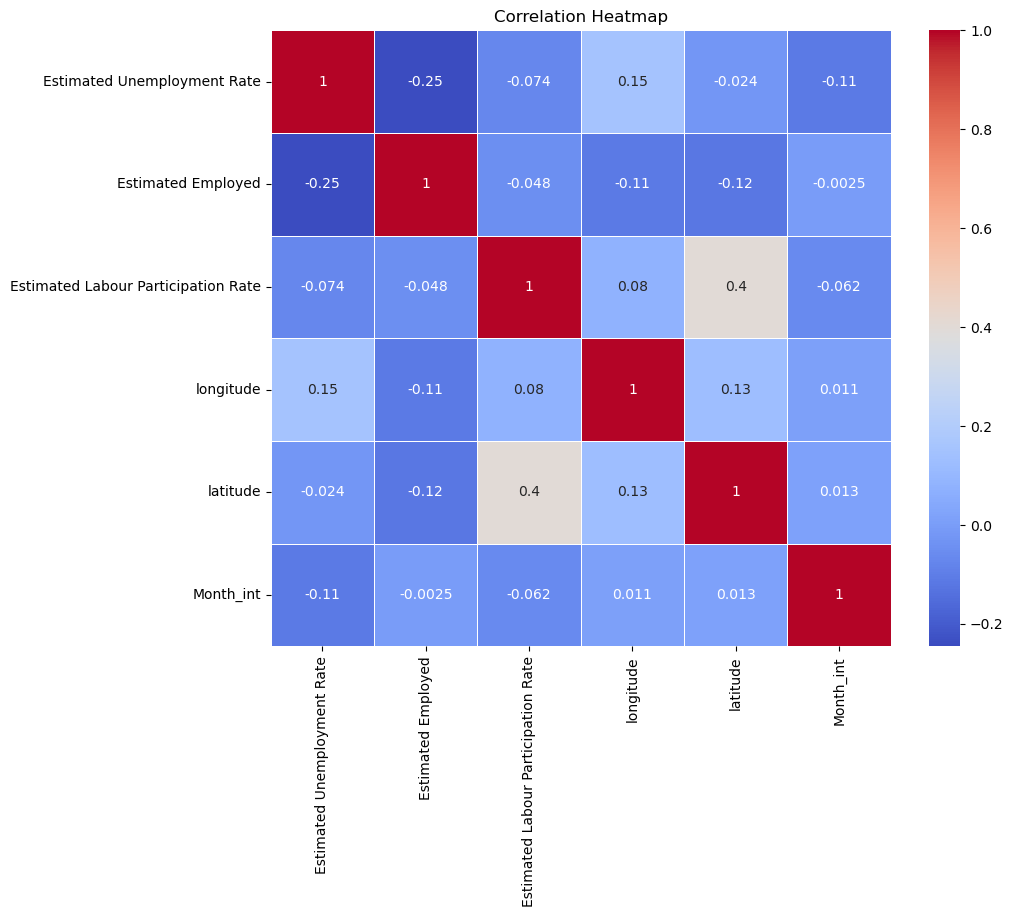

In [11]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

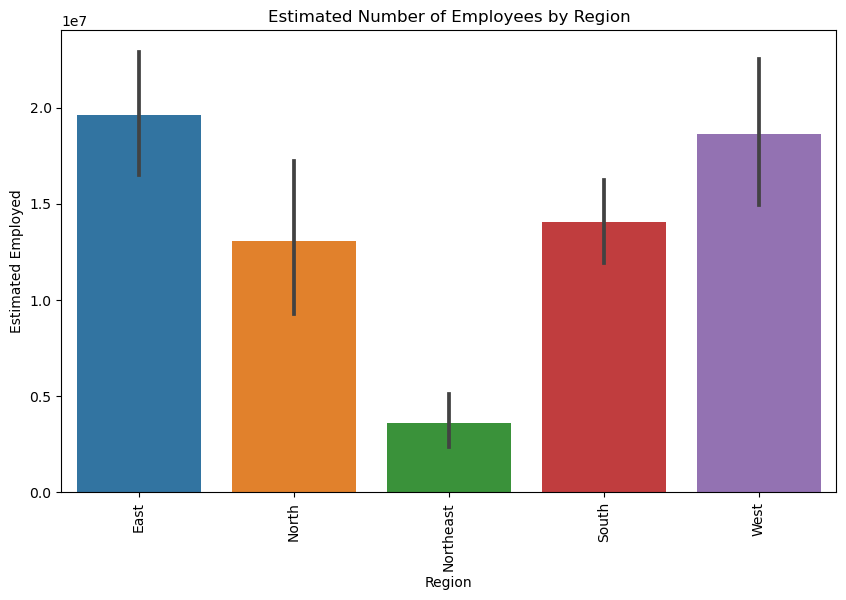

In [12]:

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Estimated Employed", data=data)
plt.title("Estimated Number of Employees by Region")
plt.xlabel("Region")
plt.ylabel("Estimated Employed")
plt.xticks(rotation=90)
plt.show()


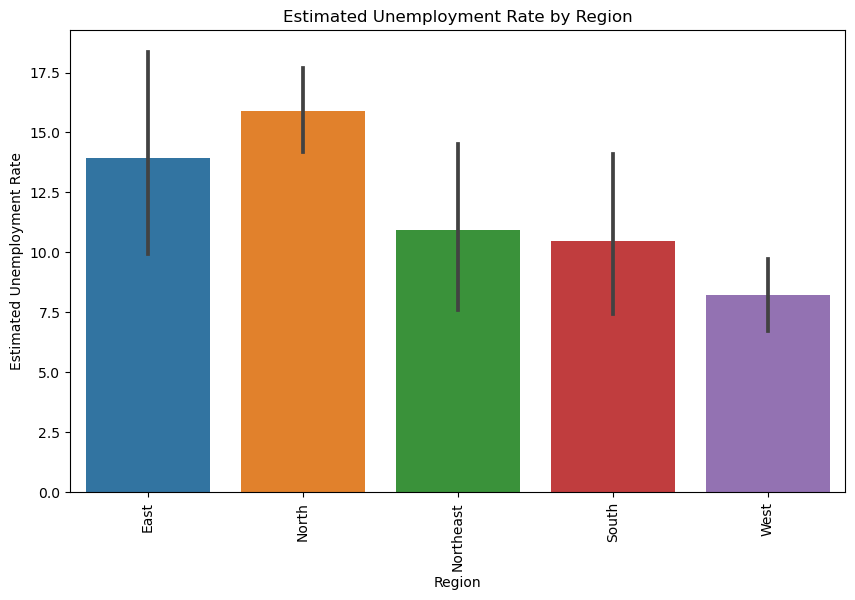

In [13]:
plt.figure(figsize = (10, 6))
sns.barplot(x = "Region", y = "Estimated Unemployment Rate", data = data)
plt.title("Estimated Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Estimated Unemployment Rate")
plt.xticks(rotation = 90)
plt.show()

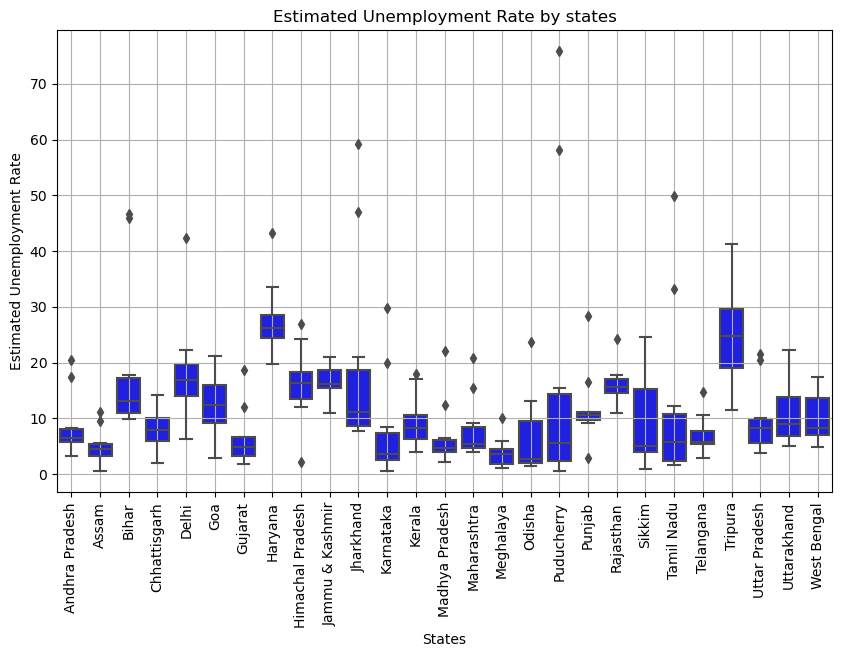

In [14]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "States", y = "Estimated Unemployment Rate", data = data,color='blue')
plt.title("Estimated Unemployment Rate by states")
plt.xlabel("States")
plt.ylabel("Estimated Unemployment Rate")
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()


In [15]:
def plot_unemployment(region):
    plt.figure(figsize = (10, 6))
    sns.barplot(x = "States", y = "Estimated Unemployment Rate", data = data[data["Region"] == region])
    plt.title(f"Unemployment Rate in {region}")
    plt.xlabel("States")
    plt.ylabel("Estimated Unemployment Rate")
    plt.xticks(rotation = 90)
    plt.show()

# Creating a dropdown widget to select a region
region_dropdown = widgets.Dropdown(options = data["Region"].unique(), description = "Region:")

# Creating an interactive plot
interactive_plot = interact(plot_unemployment, region = region_dropdown)

display(interactive_plot)

interactive(children=(Dropdown(description='Region:', options=('South', 'Northeast', 'East', 'West', 'North'),…

<function __main__.plot_unemployment(region)>